#Time-Series Forecasting

Time series are everywhere. You may have seen them in stock prices, weather forecasts, historical trends, such as Moore's law. TIme series helps us to analize a particular variable/variables of interest over a period of time.<br>
The below is the plot is an example of time series data where we can see, how many tons of different meats were produced over a time.

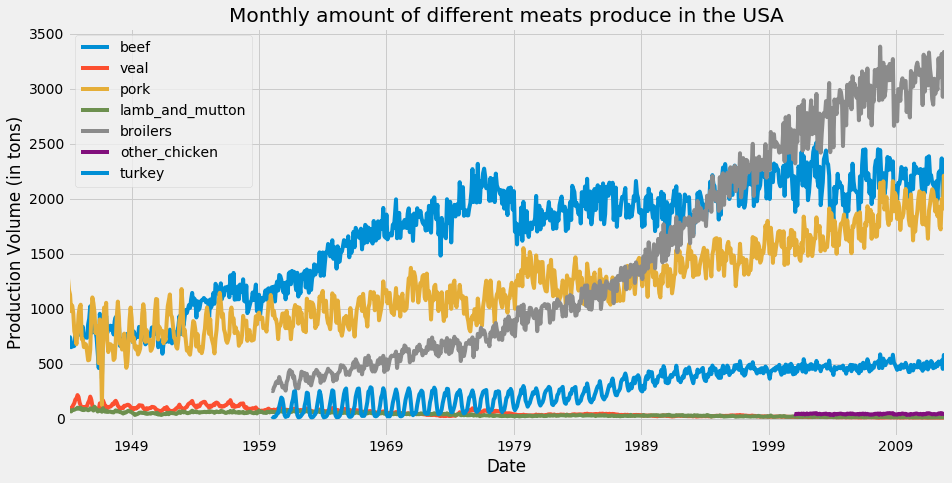Source :https://campus.datacamp.com/courses/visualizing-time-series-data-in-python/work-with-multiple-time-series?ex=5

We will use the **Sunspots** Dataset for predicting number of sunspots in a period of one month.The dataset consists of 3 columns:

1. The first columns is just indexing
2. The second column is periodically spaced dates of one month starting from Jan 1st 1749 till Jan 1st 2021.
3.The Third column represents monthly mean total sunspot number of the corresponding month in the row.




###Steps covered in this notebook

*   How to prepare time series data so that it is interpretable by ML(LSTM) Model.
*   How to split Dataset for training and testing.
*   Training on windows of data, and you'll also get hands-on in forecasting
*   Build the model and train it!

<br>


Here our aim of this project is to perform all the operations mentioned above and use the same to predict Monthly mean sunspot number for upcoming months that is after Jan 2021.


Libraries used in this project:
1. Numpy
2. Matplotlib
3. Pandas
4. TensorFlow

##Now lets load and prepare the dataset


You can download the Dataset from [here](https://www.kaggle.com/robervalt/sunspots)

In [4]:
#First import all the dependencies you need
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import math
import pandas as pd


In [5]:
#Time to look at our csv file
df_sun = pd.read_csv('/content/drive/MyDrive/Dataset/Sunspots.csv')

print(df_sun.shape)
#Therefore from the shape we can see we have 3265 rows and 3 columns

#Prints the first 5 rows
df_sun.head()

(3265, 3)


,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


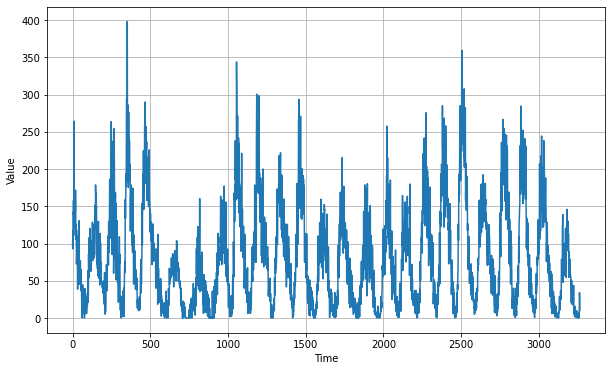

In [20]:
# Let's visualize the data

# It is a simple function to plot time x axis values y axis 

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)  #prepares the plot, the first arguement is for X-axis and the second is for y-axis
    plt.xlabel("Time")                                    #naming the x-axis
    plt.ylabel("Value")                                   #naming the y-axis
    plt.grid(True)                                        #to make the grid visible

plt.figure(figsize=(10, 6))
plot_series(  df_sun['Unnamed: 0'] ,df_sun['Monthly Mean Total Sunspot Number'])  #plotting Monthly Mean Total Sunspot Number column as y-axis and the indexing as x-axis

Now that the dataset is in the Dataframe, we can start preparing the dataset in the required format.

I have attached a video below how to reform so that it can be trained by the model

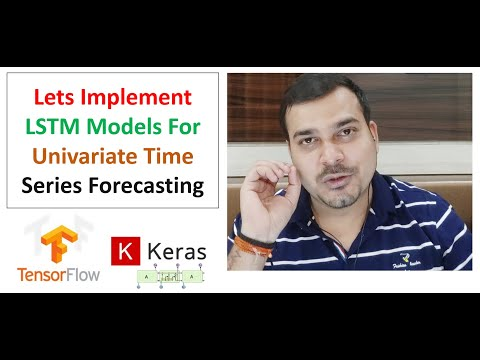

In [6]:
#@title 
from IPython.display import YouTubeVideo
YouTubeVideo('UbvkhuqVqUI')

In [17]:
# Inputs: data series, size of the window,The size of the batches to use when training,
# the size of the shuffle buffer, which determines how the data will be shuffled.
#
# Expand the dimensions of the series to work with the LSTM's
# Create dataset ds from the series
# Slice the data up into the appropriate windows, shifted by one time set.
# keep them all the same size by setting drop remainder to true.
# flatten the data into chunks in the size of our window_size + 1.
# Shuffle it with shuffle buffer that speeds things up with large datasets
# Return the dataset that batched into the selected batch size 

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

To get a clearer idea of what is happening in the above function, let us consider a dummy dataset and play with the arguements

In [10]:
#Creating a dummy Dataset
dataset = tf.data.Dataset.range(10)
for val in dataset:
   print(val.numpy())

0
1
2
3
4
5
6
7
8
9


In [11]:
dataset = tf.data.Dataset.range(10)
#The first arguement '5' specifies how many numbers come in the slicing window, and shift=1 shift by one number for next row
dataset = dataset.window(5, shift=1)  
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 
6 7 8 9 
7 8 9 
8 9 
9 


In [12]:
dataset = tf.data.Dataset.range(10)
#The first arguement '6' specifies how many numbers come in the slicing window, and shift=1 shift by one number for next row
dataset = dataset.window(6, shift=1)  
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

0 1 2 3 4 5 
1 2 3 4 5 6 
2 3 4 5 6 7 
3 4 5 6 7 8 
4 5 6 7 8 9 
5 6 7 8 9 
6 7 8 9 
7 8 9 
8 9 
9 


In [13]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)  #Keeping drop_remiander=True deletes the rows which does not have equal numbers
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [14]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
#Converting into numpy array because we have to give this as input to a tf model
dataset = dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
  print(window.numpy())


[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [16]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
#All the last element are considered as 'labels' and rest are the inputs
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
  print(x.numpy(), y.numpy())

[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


###How to split the dataset into train and test dataset?
To split we will take the last chunk i.e the last few months in and use it as test data. Here in our case we will take timestamps from index 2500-3264(Indicated in the blue shade).<br>
It is not necessary that you have to take from 2500, this is one of the hyperparameters and you can play around it and see its effect on different evaluation metrics.

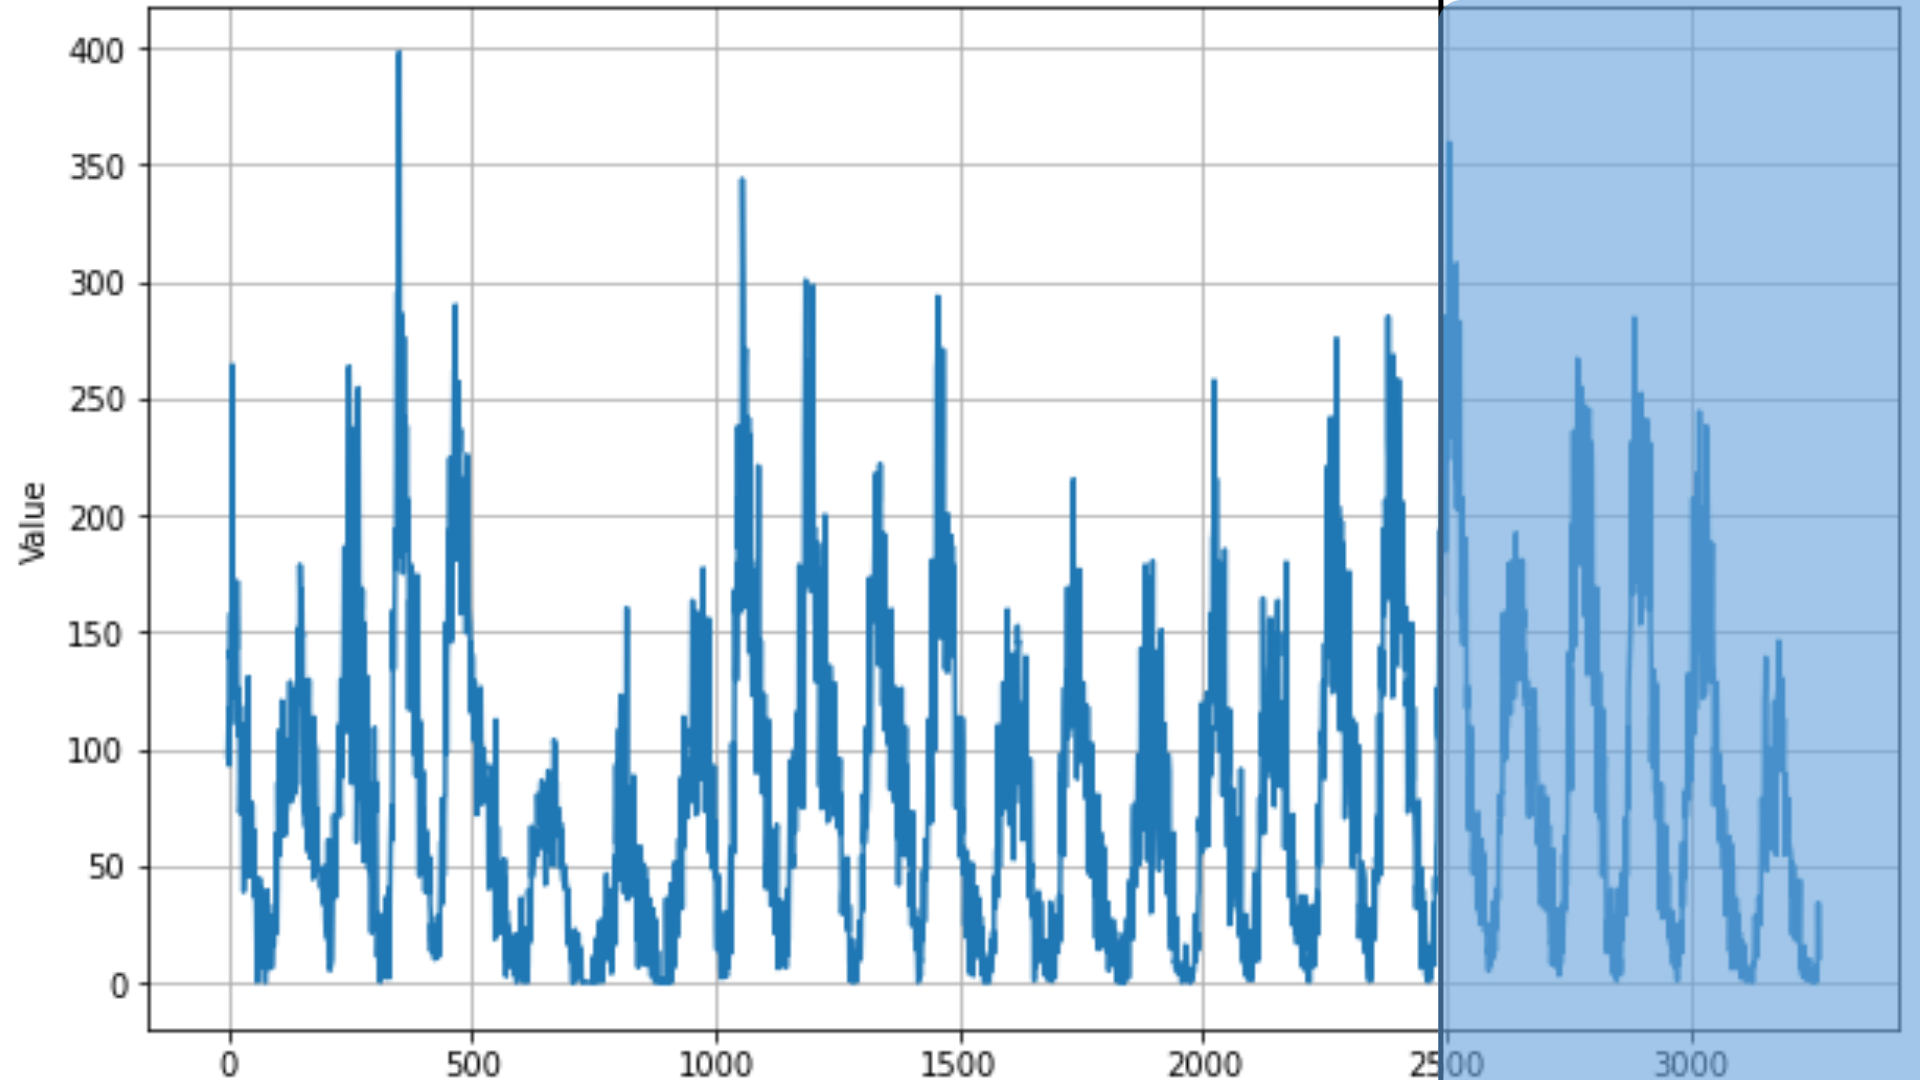

In [21]:
# Let's take 80% of the data as train set
split_time = 2500

#Before splitting let us define our feature and label or X and Y for training
series = df_sun['Monthly Mean Total Sunspot Number']  #Here taking 'Y' as Monthly Mean Total Sunspot Number as it is what we intend to predict
time = df_sun['Unnamed: 0']                           #Here the corresponding numbers are the 'X' as each number represent subsequent months from Jan 1st 1749

#using slicing to extract train and valid dataset
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [22]:
#setting few hyperparameters, feel free to change and see the effect it has on model performance
shuffle_buffer_size = 1000
window_size = 64
batch_size = 128

# Use windowed_dataset function to make dataset suitable
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)


<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(2500,)


In [23]:
#By now I believe you are well equipped to understand the model architecture from the below code

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                          strides=1, padding='causal',
                          activation='relu',
                          input_shape=[None, 1]),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x * 400)
])

#Defining our optimizer, here I have taken Stochaistic Gradient Descent as my optimizer
optimizer = tf.keras.optimizers.SGD(lr=7e-6, momentum=0.9)

#Choosing a loss function
#https://www.cantorsparadise.com/huber-loss-why-is-it-like-how-it-is-dcbe47936473 
#Check the above article for explanation for huber loss
loss = tf.keras.losses.Huber()

#using the huber loss and optimizer just defined above and we are using 'mean_square_error' as our metric to measure model performance
model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])

history = model.fit(train_set, epochs=30)

Epoch 1/30
20/20 [==============================] - 6s 127ms/step - loss: 49.0360 - mae: 49.5332
Epoch 2/30
20/20 [==============================] - 3s 128ms/step - loss: 32.0366 - mae: 32.5326
Epoch 3/30
20/20 [==============================] - 3s 128ms/step - loss: 26.0439 - mae: 26.5383
Epoch 4/30
20/20 [==============================] - 3s 129ms/step - loss: 23.6110 - mae: 24.1049
Epoch 5/30
20/20 [==============================] - 3s 127ms/step - loss: 22.4627 - mae: 22.9568
Epoch 6/30
20/20 [==============================] - 3s 131ms/step - loss: 20.8368 - mae: 21.3302
Epoch 7/30
20/20 [==============================] - 3s 130ms/step - loss: 20.1781 - mae: 20.6705
Epoch 8/30
20/20 [==============================] - 3s 131ms/step - loss: 19.9718 - mae: 20.4638
Epoch 9/30
20/20 [==============================] - 3s 128ms/step - loss: 19.5068 - mae: 19.9988
Epoch 10/30
20/20 [==============================] - 3s 130ms/step - loss: 19.1676 - mae: 19.6597
Epoch 11/30
20/20 [==========

In [24]:
# We can use this function to make some prediction by using the trained model 

def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)           #loading the data in tensor format followed in TensorFlow
    ds = ds.window(window_size, shift=1, drop_remainder=True) #Using the window function to get it into the trtained window size
    ds = ds.flat_map(lambda w: w.batch(window_size))          
    ds = ds.batch(32).prefetch(1)                             #making batches for faster computation
    forecast = model.predict(ds)                              #passing the data to the trained model for prediction
    return forecast

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


First 10 Predictions : 
 [231.55913 224.15335 241.61475 242.44516 219.82272 246.27733 252.1036
 238.65509 248.60081 231.65884]

mae :  17.002764


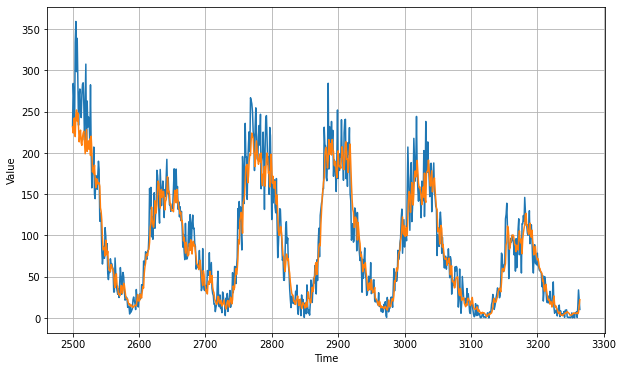

In [25]:
#Predict first 10 predictions
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)  #Using he trained model to predict
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]             #Converting into required shape
print("First 10 Predictions :","\n", rnn_forecast[:10])
print('')
print("mae : ", tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy())

#Ploting the results
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

From the above Prediction array we can see the Monthly *Mean Total Sunspot Number* from Feb 2021 till Nov 2021.

* Feb 2021 - 231.55913
* March 2021 - 224.15335
* April 2021 - 241.61475 
* May 2021  - 242.44516 
* June 2021 - 219.82272 
* July 2021 - 246.27733 
* Aug 2021  - 252.1036
* Sep 2021 - 238.65509 
* Oct 2021 - 248.60081 
* Nov 2021 - 231.65884

Hope you had fun building this project!


